<a href="https://colab.research.google.com/github/Hameedhullah/Machine-Learning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression - Binary Classification

In [1]:
!pip install autoviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 74.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 98.1 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.0.3
    Uninstalling xgboost-2.0.3:
      Successfully uninstalled xgboost-2.0.3
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
  Attempting uninstall: bokeh
   

In [13]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default='notebook'
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [14]:
# Importing the data

soc_net = pd.read_csv("Social_Network_Ads.csv")
soc_net.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
# Profile of the data

soc_net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
# Null Values

soc_net.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
# Duplicated Values

soc_net.duplicated().sum()

0

In [6]:
# Unique value in the data

soc_net.nunique().sort_values(ascending=True)

Gender               2
Purchased            2
Age                 43
EstimatedSalary    117
User ID            400
dtype: int64

In [7]:
# List of unique value in column

for i in soc_net.columns:
  print(f'Unique value in {i}:')
  print(soc_net[i].unique(),'\n')

Unique value in User ID:
[15624510 15810944 15668575 15603246 15804002 15728773 15598044 15694829
 15600575 15727311 15570769 15606274 15746139 15704987 15628972 15697686
 15733883 15617482 15704583 15621083 15649487 15736760 15714658 15599081
 15705113 15631159 15792818 15633531 15744529 15669656 15581198 15729054
 15573452 15776733 15724858 15713144 15690188 15689425 15671766 15782806
 15764419 15591915 15772798 15792008 15715541 15639277 15798850 15776348
 15727696 15793813 15694395 15764195 15744919 15671655 15654901 15649136
 15775562 15807481 15642885 15789109 15814004 15673619 15595135 15583681
 15605000 15718071 15679760 15654574 15577178 15595324 15756932 15726358
 15595228 15782530 15592877 15651983 15746737 15774179 15667265 15655123
 15595917 15668385 15709476 15711218 15798659 15663939 15694946 15631912
 15768816 15682268 15684801 15636428 15809823 15699284 15786993 15709441
 15710257 15582492 15575694 15756820 15766289 15593014 15584545 15675949
 15672091 15801658 1570618

In [8]:
# Statistical Analysis

soc_net.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User ID,400.0,NaN,NaN,NaN,15691539.7575,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Gender,400,2,Female,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,400.0,NaN,NaN,NaN,37.655,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,NaN,NaN,NaN,69742.5,34096.960282,15000.0,43000.0,70000.0,88000.0,150000.0
Purchased,400.0,NaN,NaN,NaN,0.3575,0.479864,0.0,0.0,0.0,1.0,1.0


Shape of your Data Set loaded: (400, 5)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    5 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['User ID']
To fix these data quality issues in the dataset, import Fix

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
User ID,int64,0.000000,100,15566689.000000,15815236.000000,Possible ID column: drop before modeling step.
Gender,object,0.000000,0,,,No issue
Age,int64,0.000000,10,18.000000,60.000000,No issue
EstimatedSalary,int64,0.000000,29,15000.000000,150000.000000,No issue
Purchased,int64,0.000000,0,0.000000,1.000000,No issue


Number of All Scatter Plots = 3


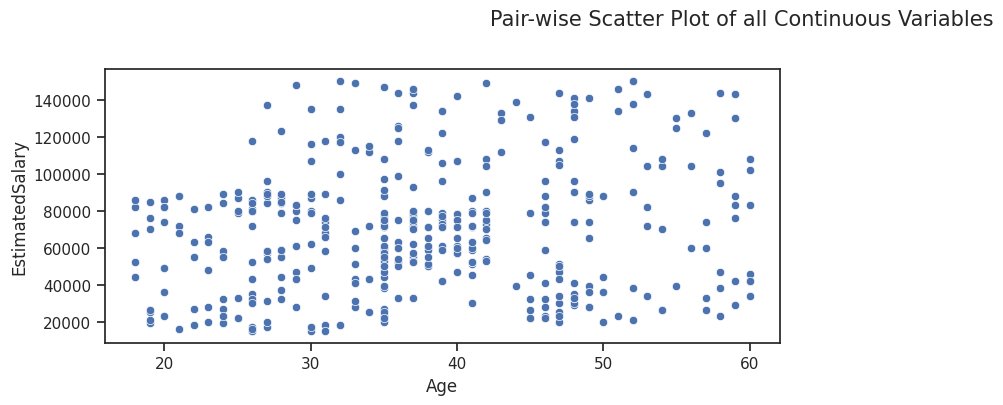

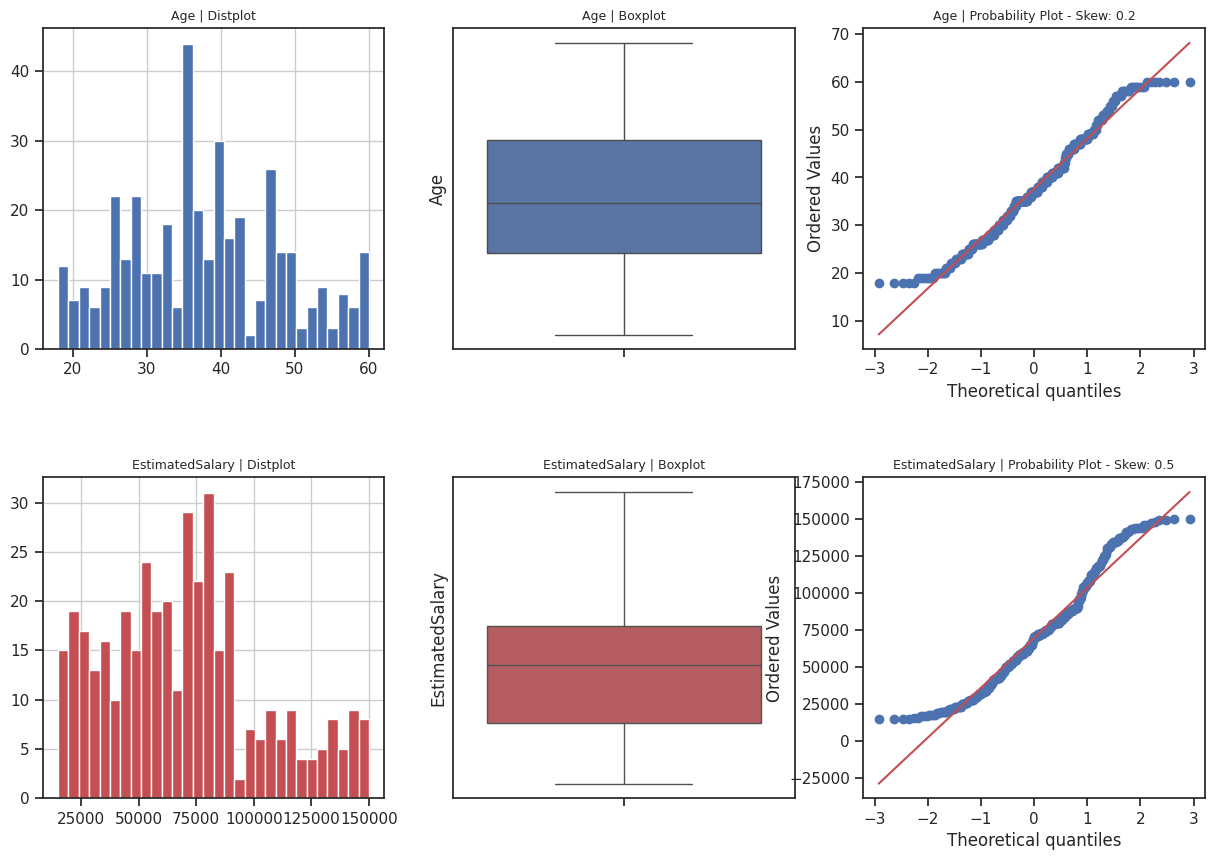

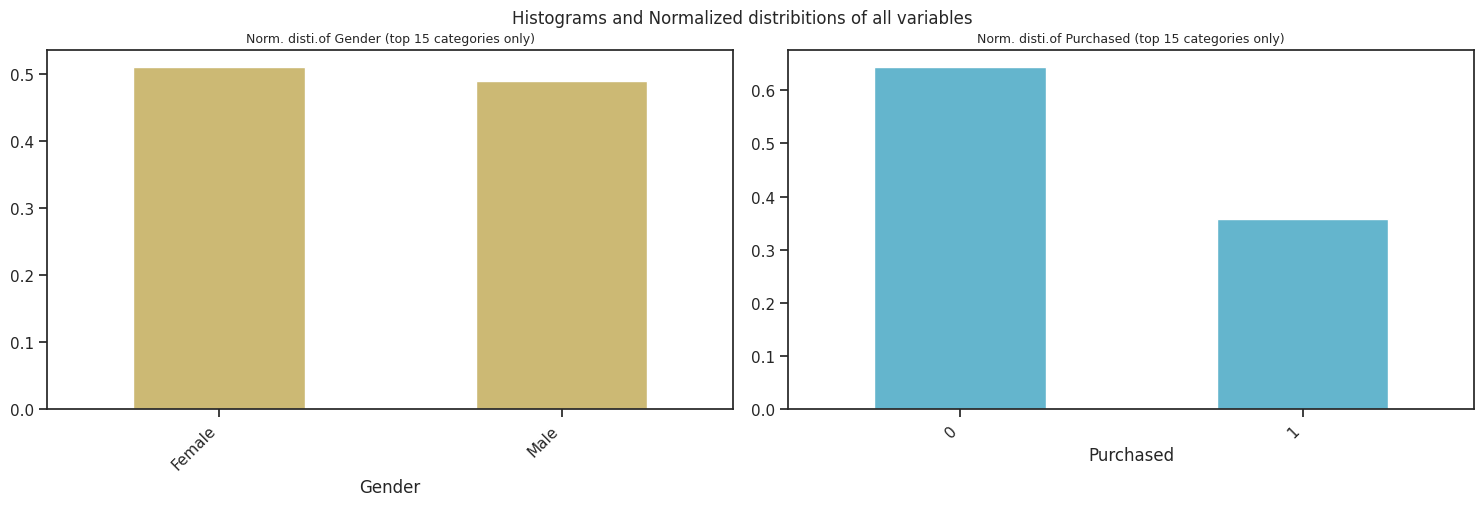

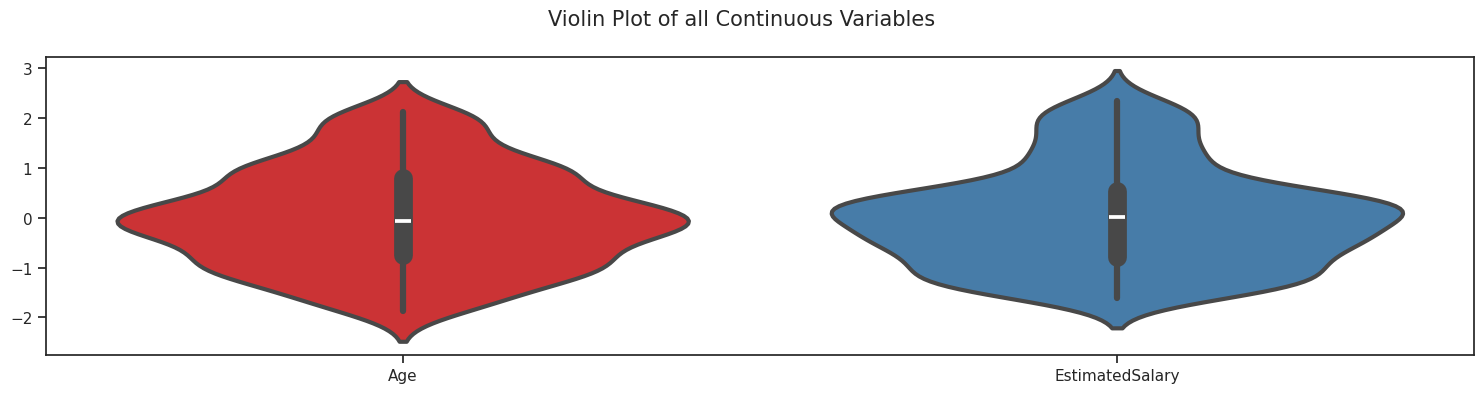

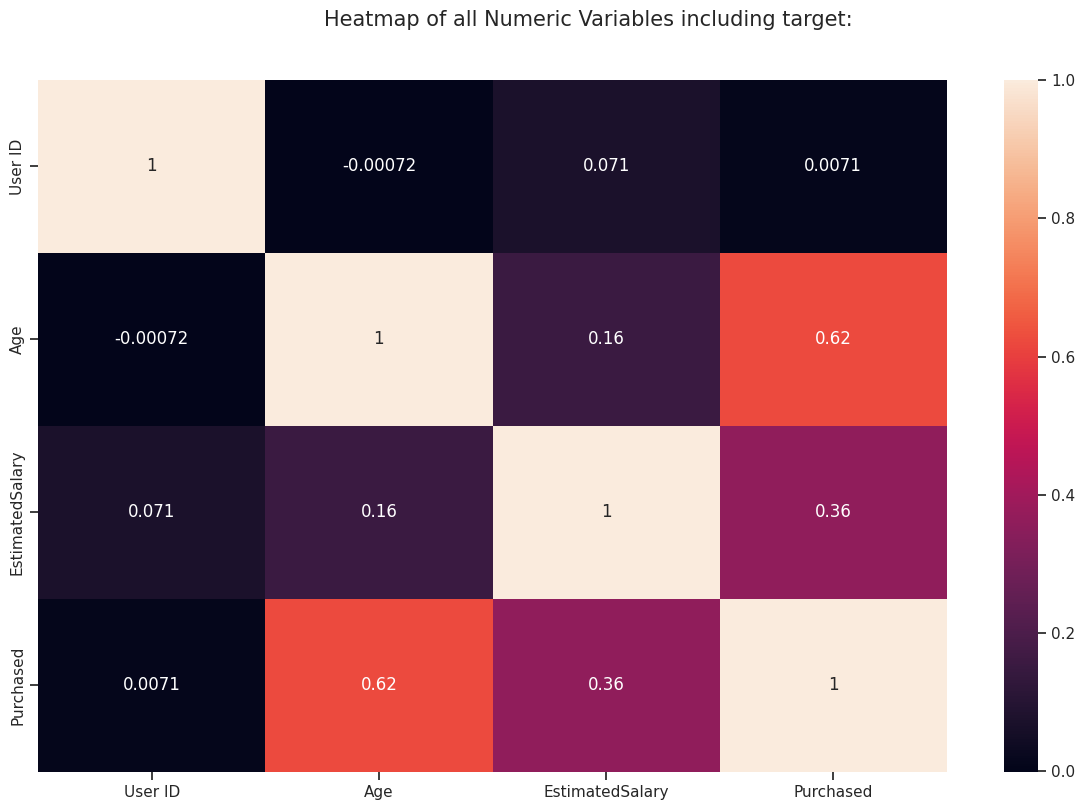

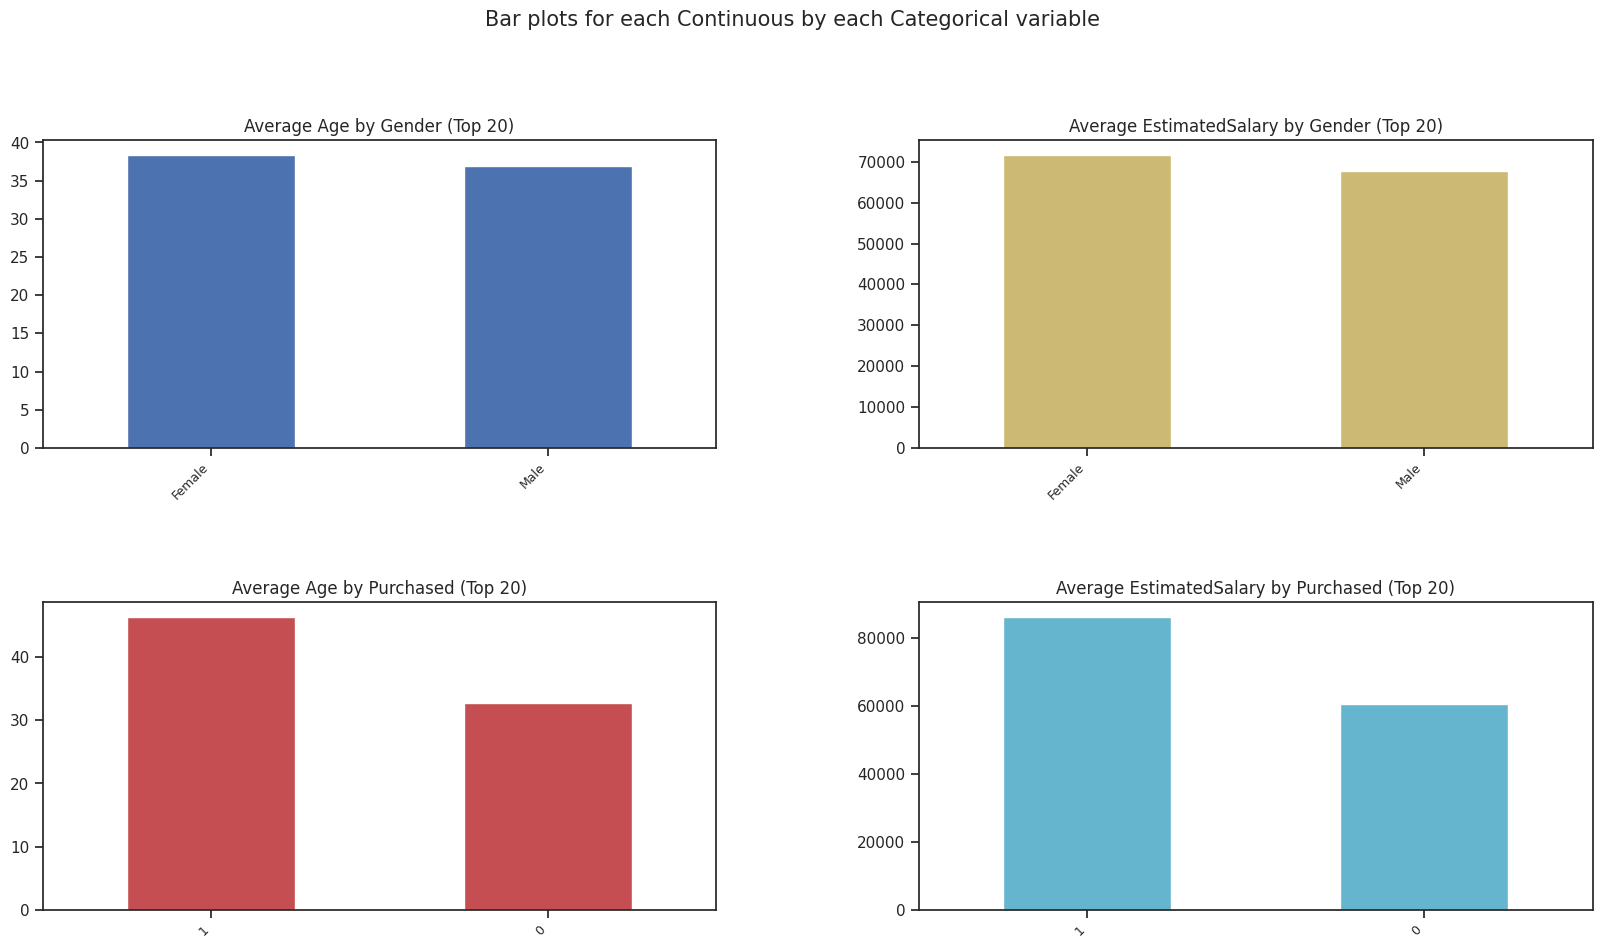

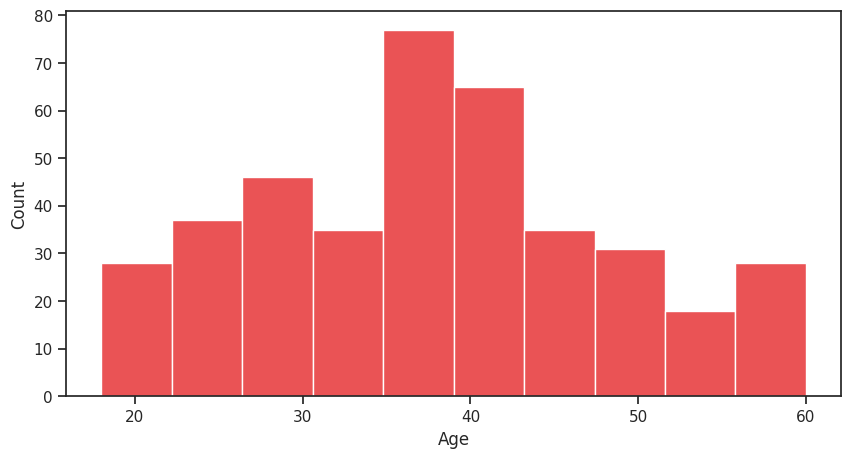

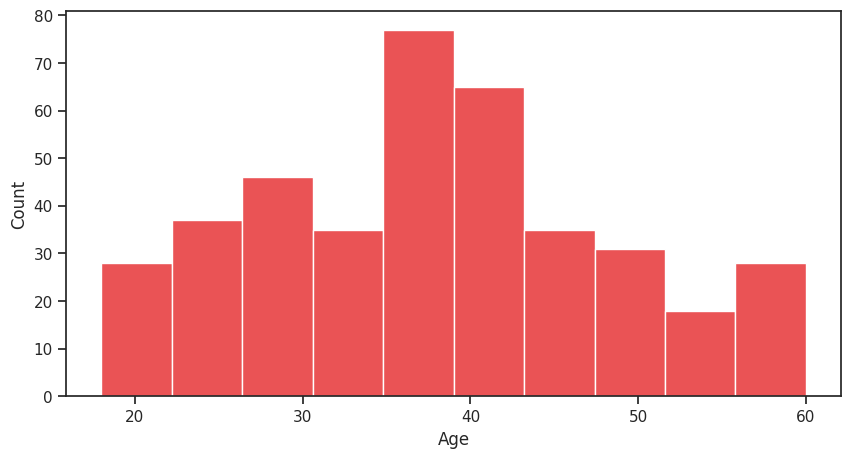

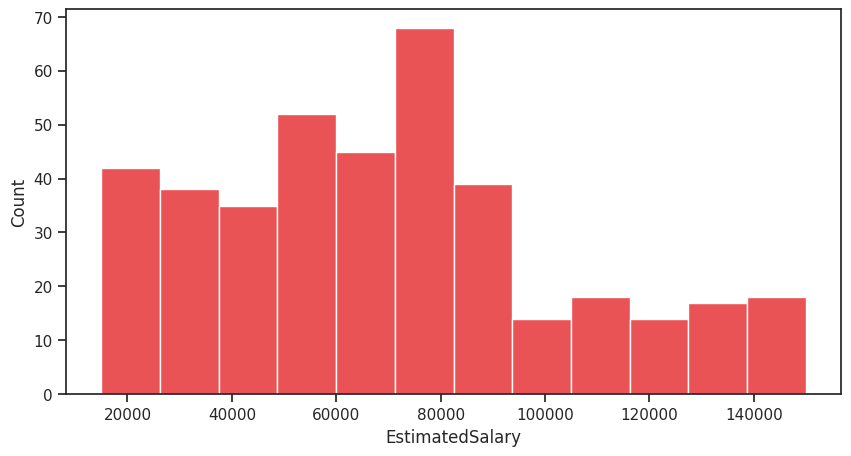

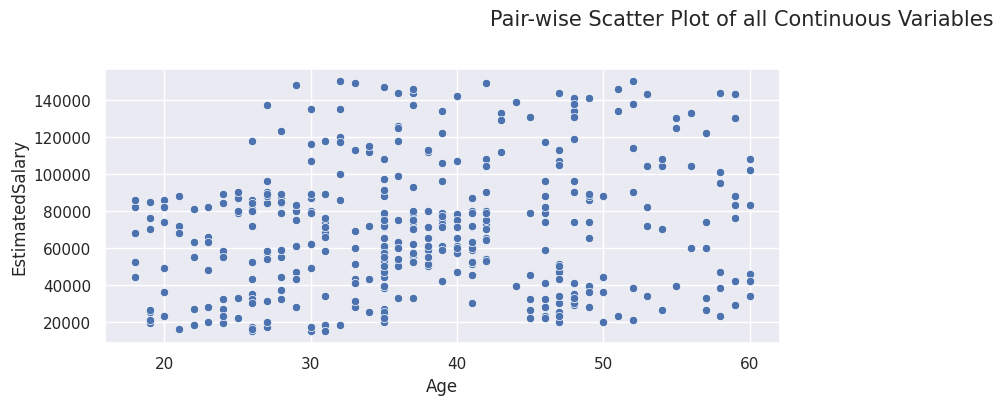

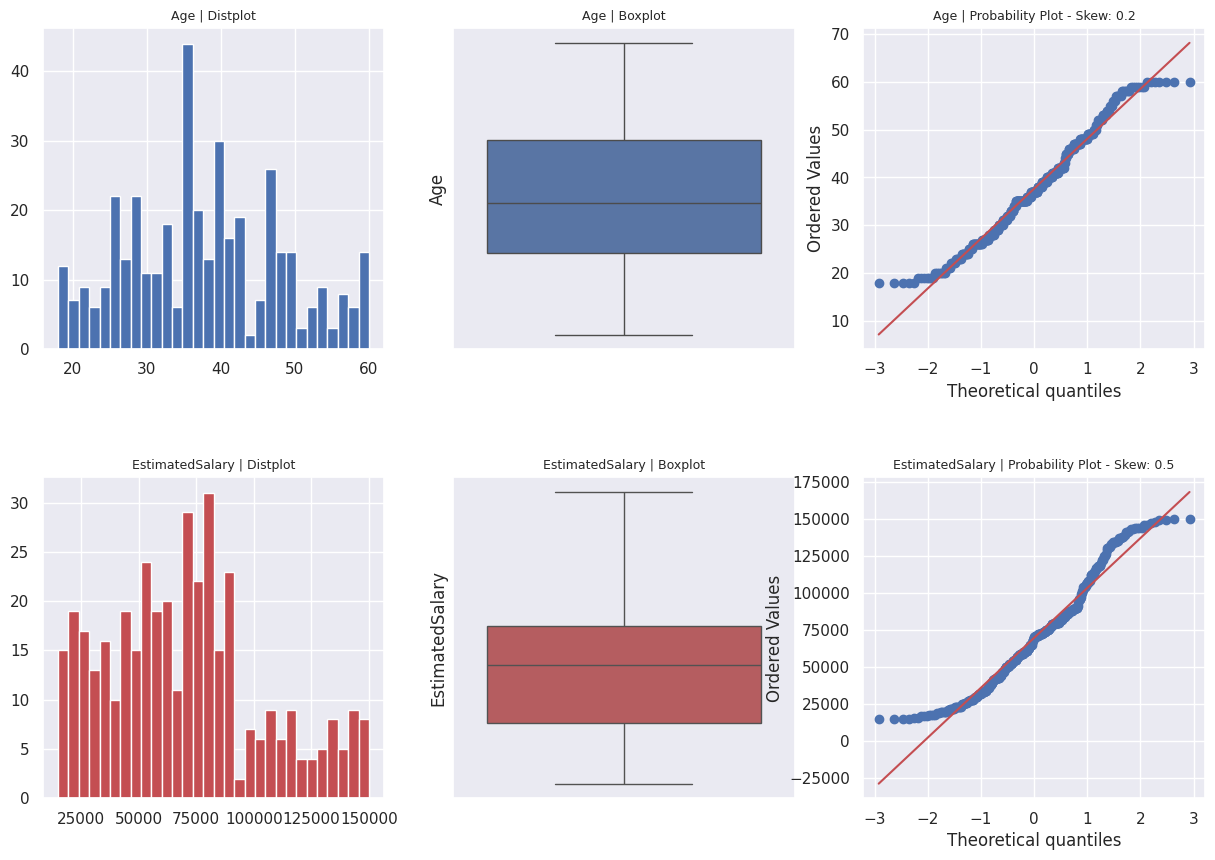

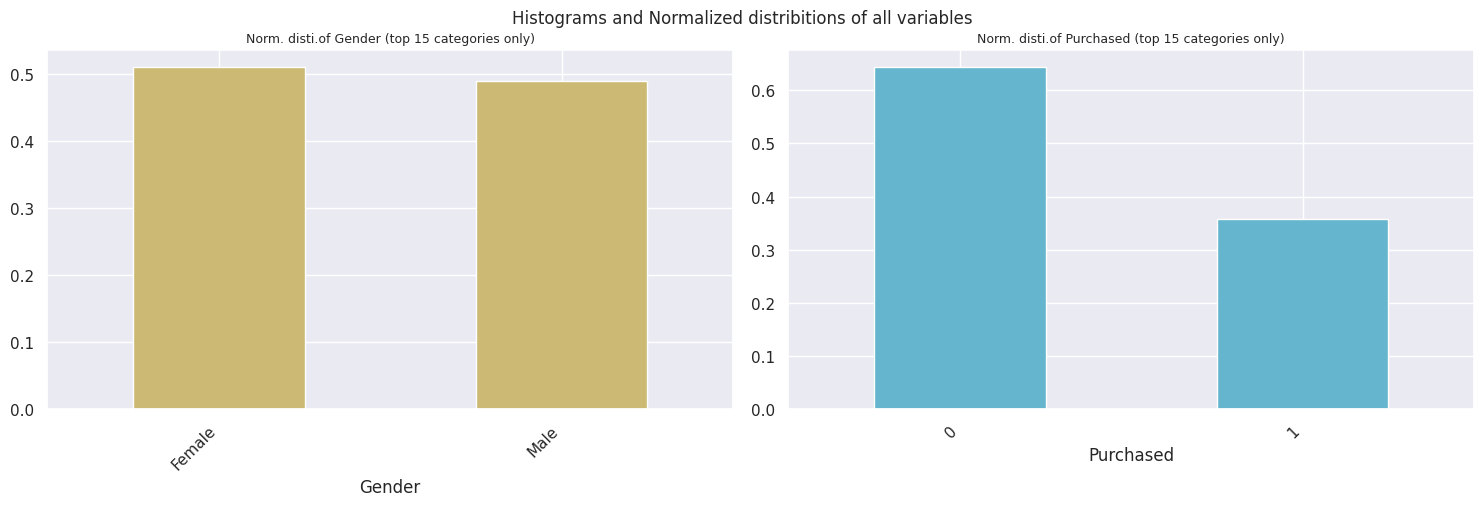

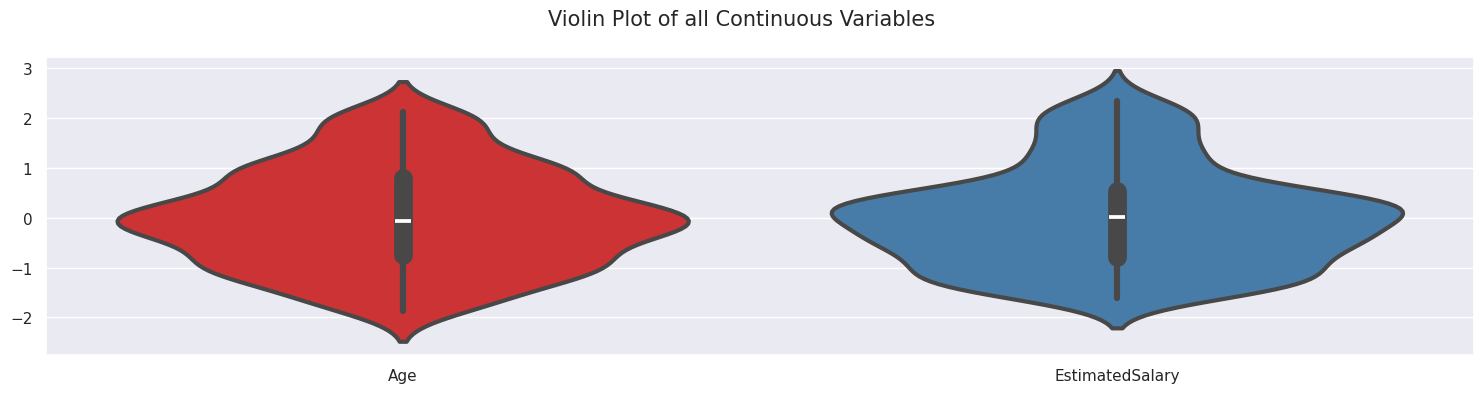

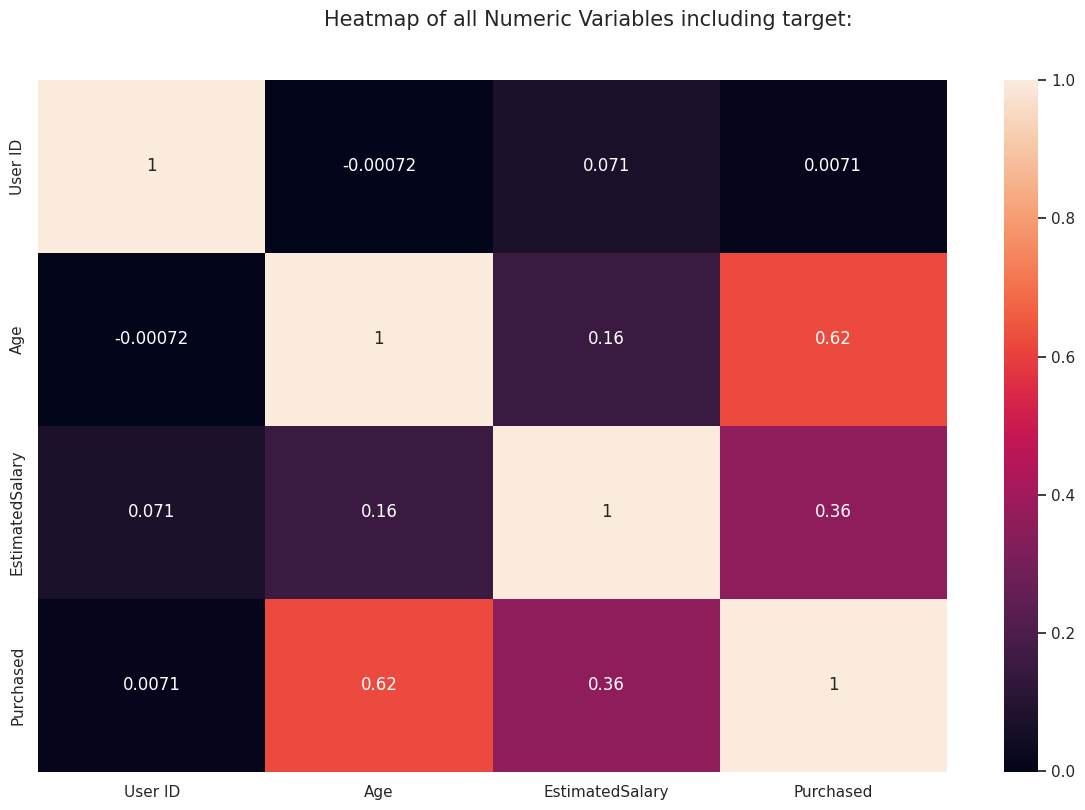

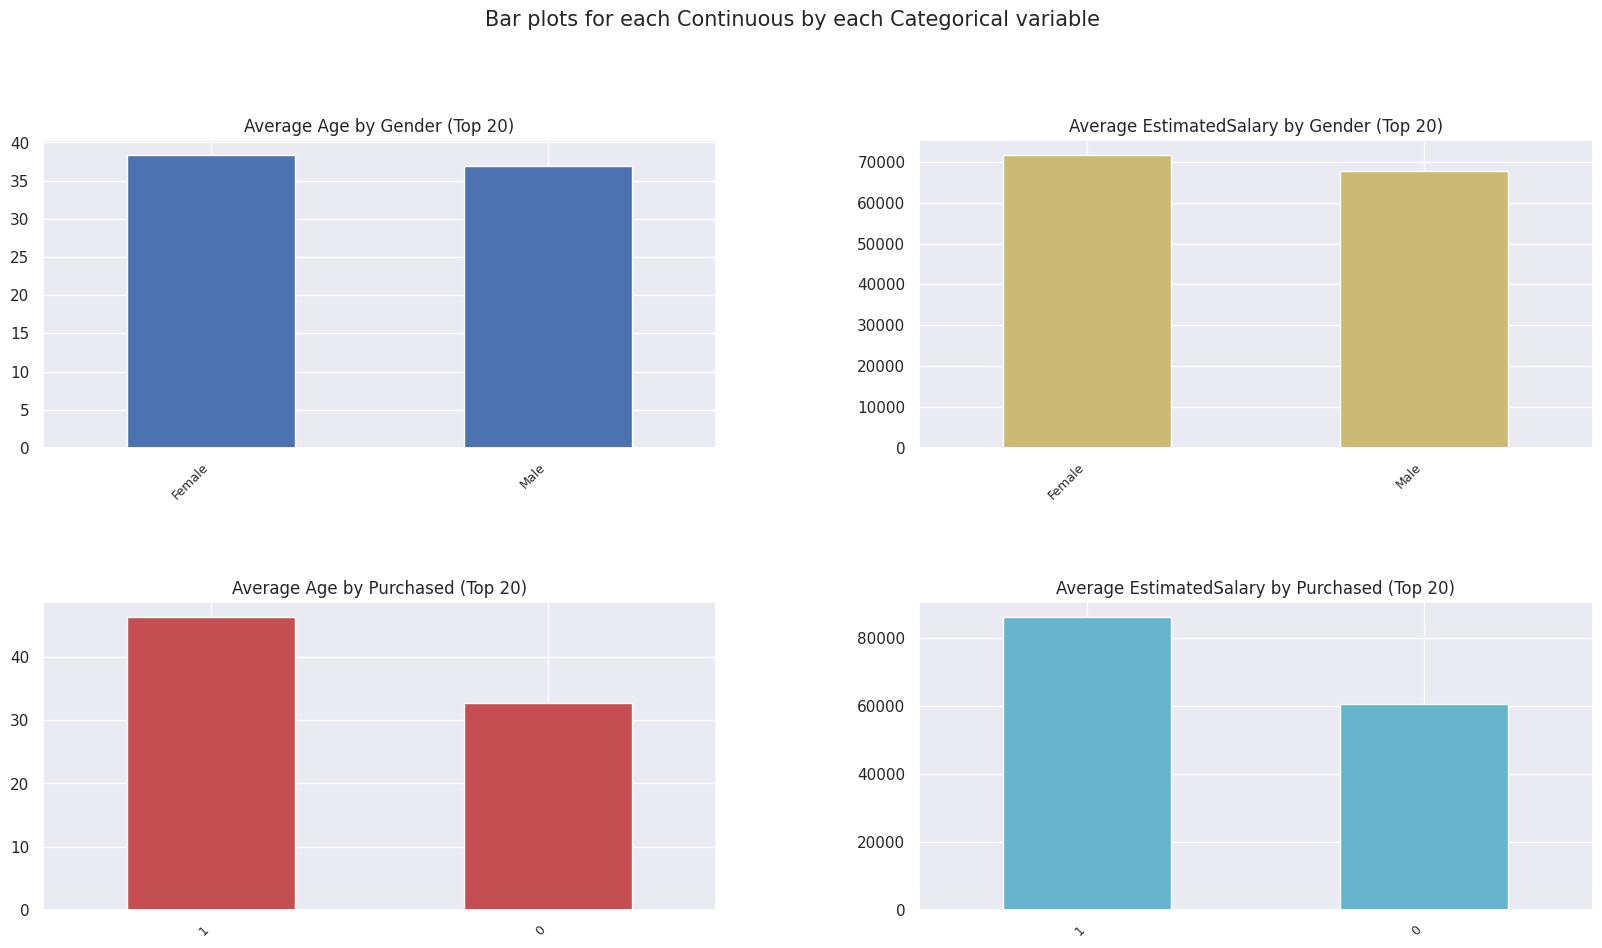

All Plots done
Time to run AutoViz = 13 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [15]:
# Graphical Analysis

autoviz_report = AV.AutoViz('Social_Network_Ads.csv')

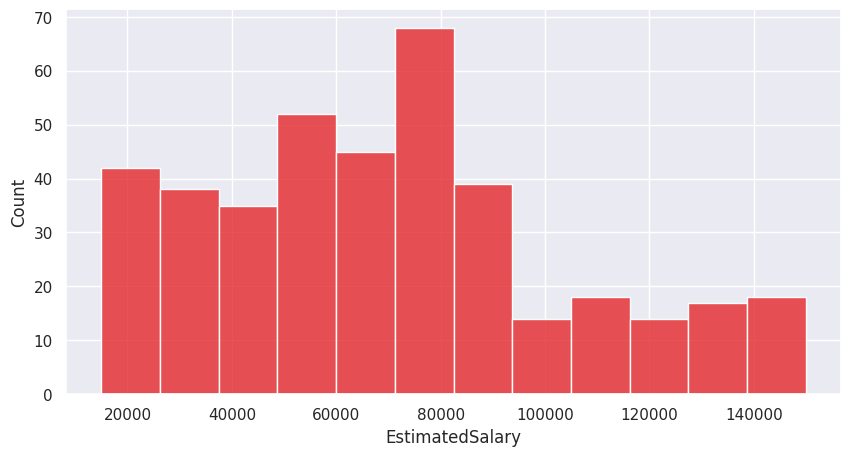

In [16]:
# checking the distribution of 'EstimatedSalary'

plt.figure(figsize=(10,5))
sns.histplot(soc_net['EstimatedSalary'])
plt.show()

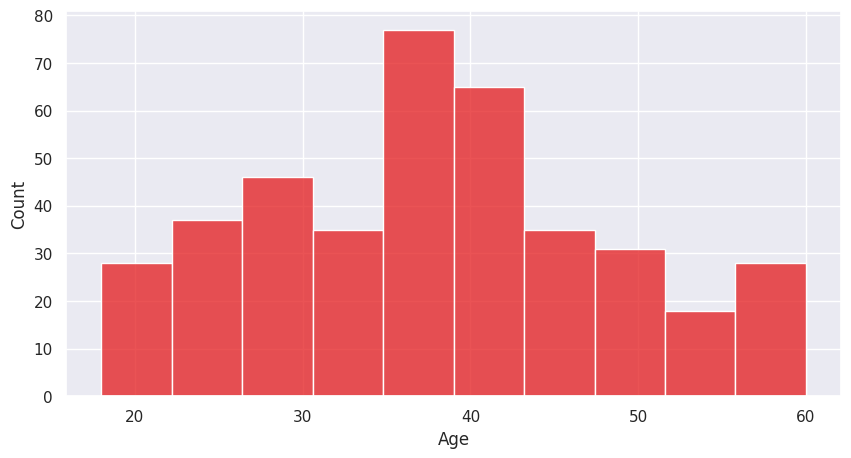

In [17]:
# checking the distribution of 'Age'

plt.figure(figsize=(10,5))
sns.histplot(soc_net['Age'])
plt.show()

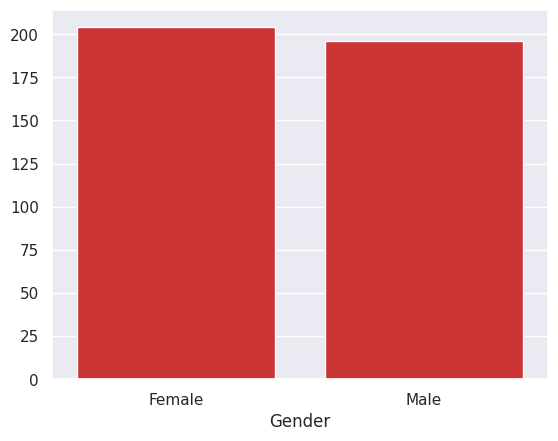

In [18]:
# Gender Distribution
sns.barplot(x=soc_net['Gender'].value_counts().index,
            y=soc_net['Gender'].value_counts().values)
plt.show()

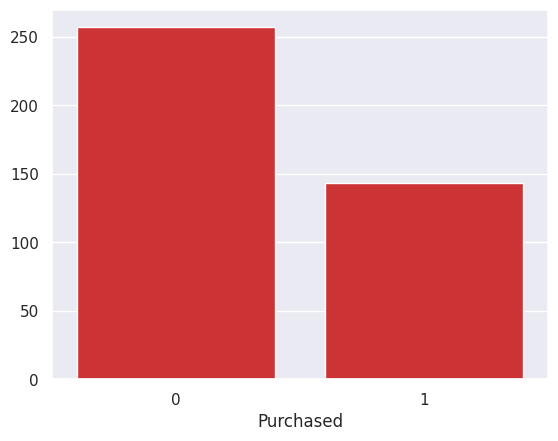

In [19]:
# Purchased Distribution

sns.barplot(x=soc_net['Purchased'].value_counts().index,
            y=soc_net['Purchased'].value_counts().values)
plt.show()

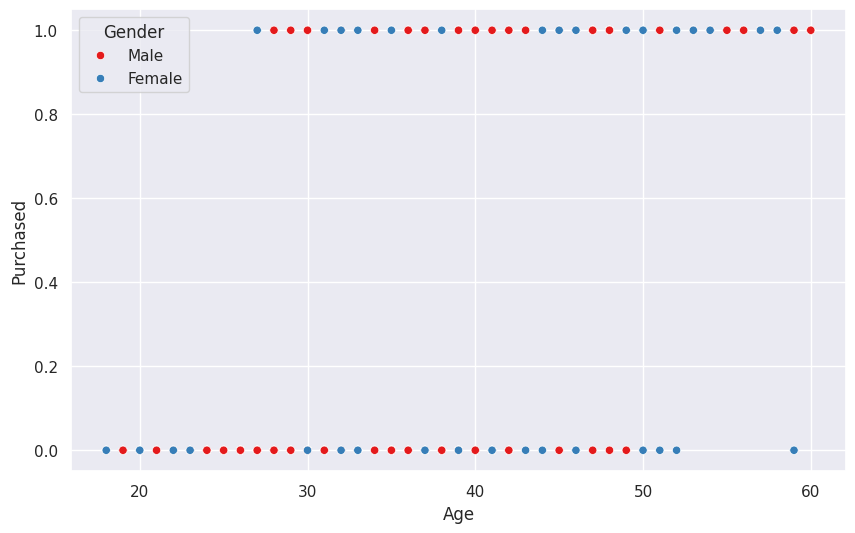

In [20]:
# Scatterplot

plt.figure(figsize=(10,6))
sns.scatterplot(data=soc_net, x='Age', y='Purchased', hue='Gender')
plt.show()

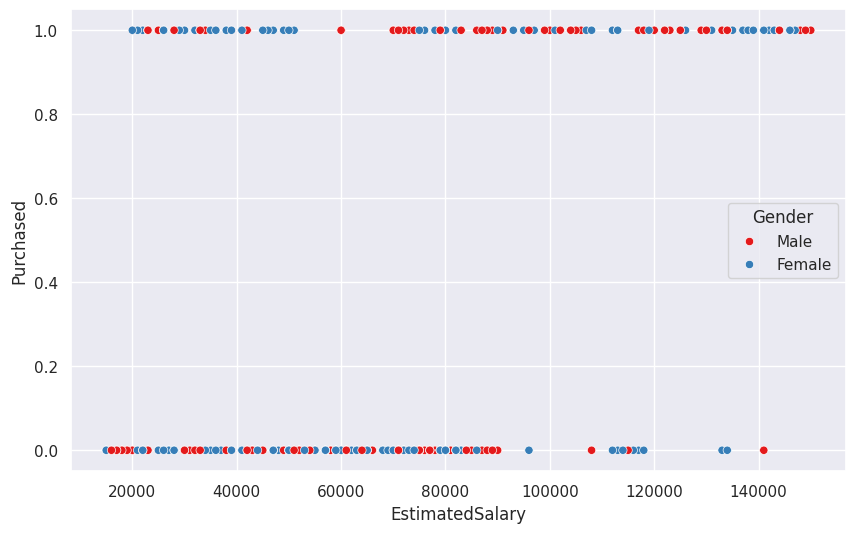

In [21]:
# Scatterplot

plt.figure(figsize=(10,6))
sns.scatterplot(data=soc_net, x='EstimatedSalary', y='Purchased', hue='Gender')
plt.show()

In [23]:
# Preprocessing
# Drop the column of 'User ID'

soc_net.drop(columns = ['User ID'],inplace = True)
soc_net.shape

(400, 4)

In [25]:
# data types

soc_net.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [30]:
# Categorical value converting to numeric way of category

def ordinal_encoder(soc_net, feats):
    for feat in feats:
        feat_val = list(np.arange(soc_net[feat].nunique()))
        feat_key = list(soc_net[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        soc_net[feat] = soc_net[feat].map(feat_dict)
    return soc_net

social_network = ordinal_encoder(soc_net, soc_net.drop(['Purchased'], axis=1).columns)
social_network.sample(5)

,Gender,Age,EstimatedSalary,Purchased
213,1,17,40,0
278,0,34,22,1
56,0,5,31,0
334,1,39,42,1
214,1,29,26,0


In [31]:
BLR_X = social_network.drop(columns = ['Purchased'])
BLR_y = social_network['Purchased']

In [32]:
scalar = StandardScaler()
BLR_X_scaled = scalar.fit_transform(BLR_X)

In [33]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(BLR_X_scaled,i) for i in range(BLR_X_scaled.shape[1])]
vif["Features"] = BLR_X.columns

#let's check the values
vif

,vif,Features
0,1.007508,Gender
1,1.026517,Age
2,1.024056,EstimatedSalary


In [34]:
BLR_x_train,BLR_x_test,BLR_y_train,BLR_y_test = train_test_split(BLR_X_scaled,BLR_y, test_size= 0.25, random_state = 29)

In [35]:
# Model Building

BLR_log_reg = LogisticRegression()

BLR_log_reg.fit(BLR_x_train,BLR_y_train)

LogisticRegression()

In [37]:
BLR_y_pred = BLR_log_reg.predict(BLR_x_test)

In [38]:
# Accuracy

accuracy = accuracy_score(BLR_y_test,BLR_y_pred)
accuracy

0.8

In [39]:
# Confusion Matrix

conf_mat = confusion_matrix(BLR_y_test,BLR_y_pred)
conf_mat

array([[63,  6],
       [14, 17]])

In [40]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [41]:
# Breaking down the formula for Accuracy
Acc_for = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Acc_for

0.8

In [42]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9130434782608695

In [43]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.8181818181818182

In [44]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.863013698630137

In [45]:
# Area Under Curve
auc = roc_auc_score(BLR_y_test, BLR_y_pred)
auc

0.7307152875175316

In [46]:
fpr, tpr, thresholds = roc_curve(BLR_y_test, BLR_y_pred)

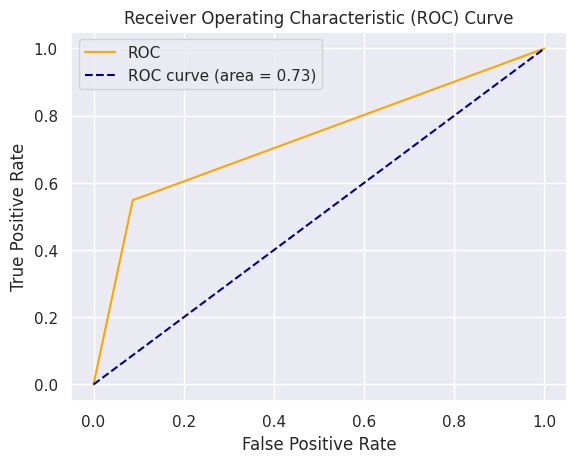

In [47]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()